# 0413 ~ 0424 Team Assignment 01 :
### predict customer's gender of department store

In [40]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

logreg = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
knn = KNeighborsClassifier()
svm = SVC()
mlp = MLPClassifier(alpha=1)
ranfor = RandomForestClassifier()
gbm = GradientBoostingClassifier()
ada = AdaBoostClassifier()
lsv = LinearSVC()

#### 데이터 불러오기

In [42]:
df = pd.read_csv('data/train.csv', encoding='cp949')
ndf = pd.read_csv('data/test.csv', encoding='cp949')
df.head()  # 가을구매건수부터 점심구매건수까지 결측치 존재, 주구매코너 데이터 한글

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [43]:
# null 값이 각 상황별 구매건수에만 존재하고
# 이러한 null 값은 모두 구매건수가 0이다 라고 표현 가능합니다.
# 주구매코너에 들어있는 값의 type이 object 이기떄문에
# category 타입으로 변경 후 숫자로 바꿔줍니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


#### 결측치 채우기

데이터를 분석하기에 앞서 계절,시간대 별로 구매한 건수가 NoN인 곳들은 그 상황에서 구매하지 않았다.<br>즉, 0건이기 때문에 이를 먼저 채워줍니다.
그리고 유일한 한글 데이터인 주구매코너 또한 숫자로 변환해줍니다.
- 여기에선 먼저 astype 을 사용해 object로 된 한글데이터를 category로 바꿔줍니다.
- 이어서 바꿔준 한글데이터를 .cat.codes 를 사용하여 숫자로 변형 시켜줍니다.

In [44]:
# 구매 건수가 0건임을 표현하기 위해 fillna를
# 사용하여 일괄적으로 값을 0으로 바꿔줍니다.
df.fillna(0, inplace=True)

# 0이라는 값이 채워졌는지 확인 합니다.
df.isnull().sum().sum()

0

In [45]:
# 데이터타입 카테고리로 변경 후 한글을 숫자로 변형합니다.
obj = ['주구매코너']
df[obj] = df[obj].apply(lambda x: x.astype('category').cat.codes)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


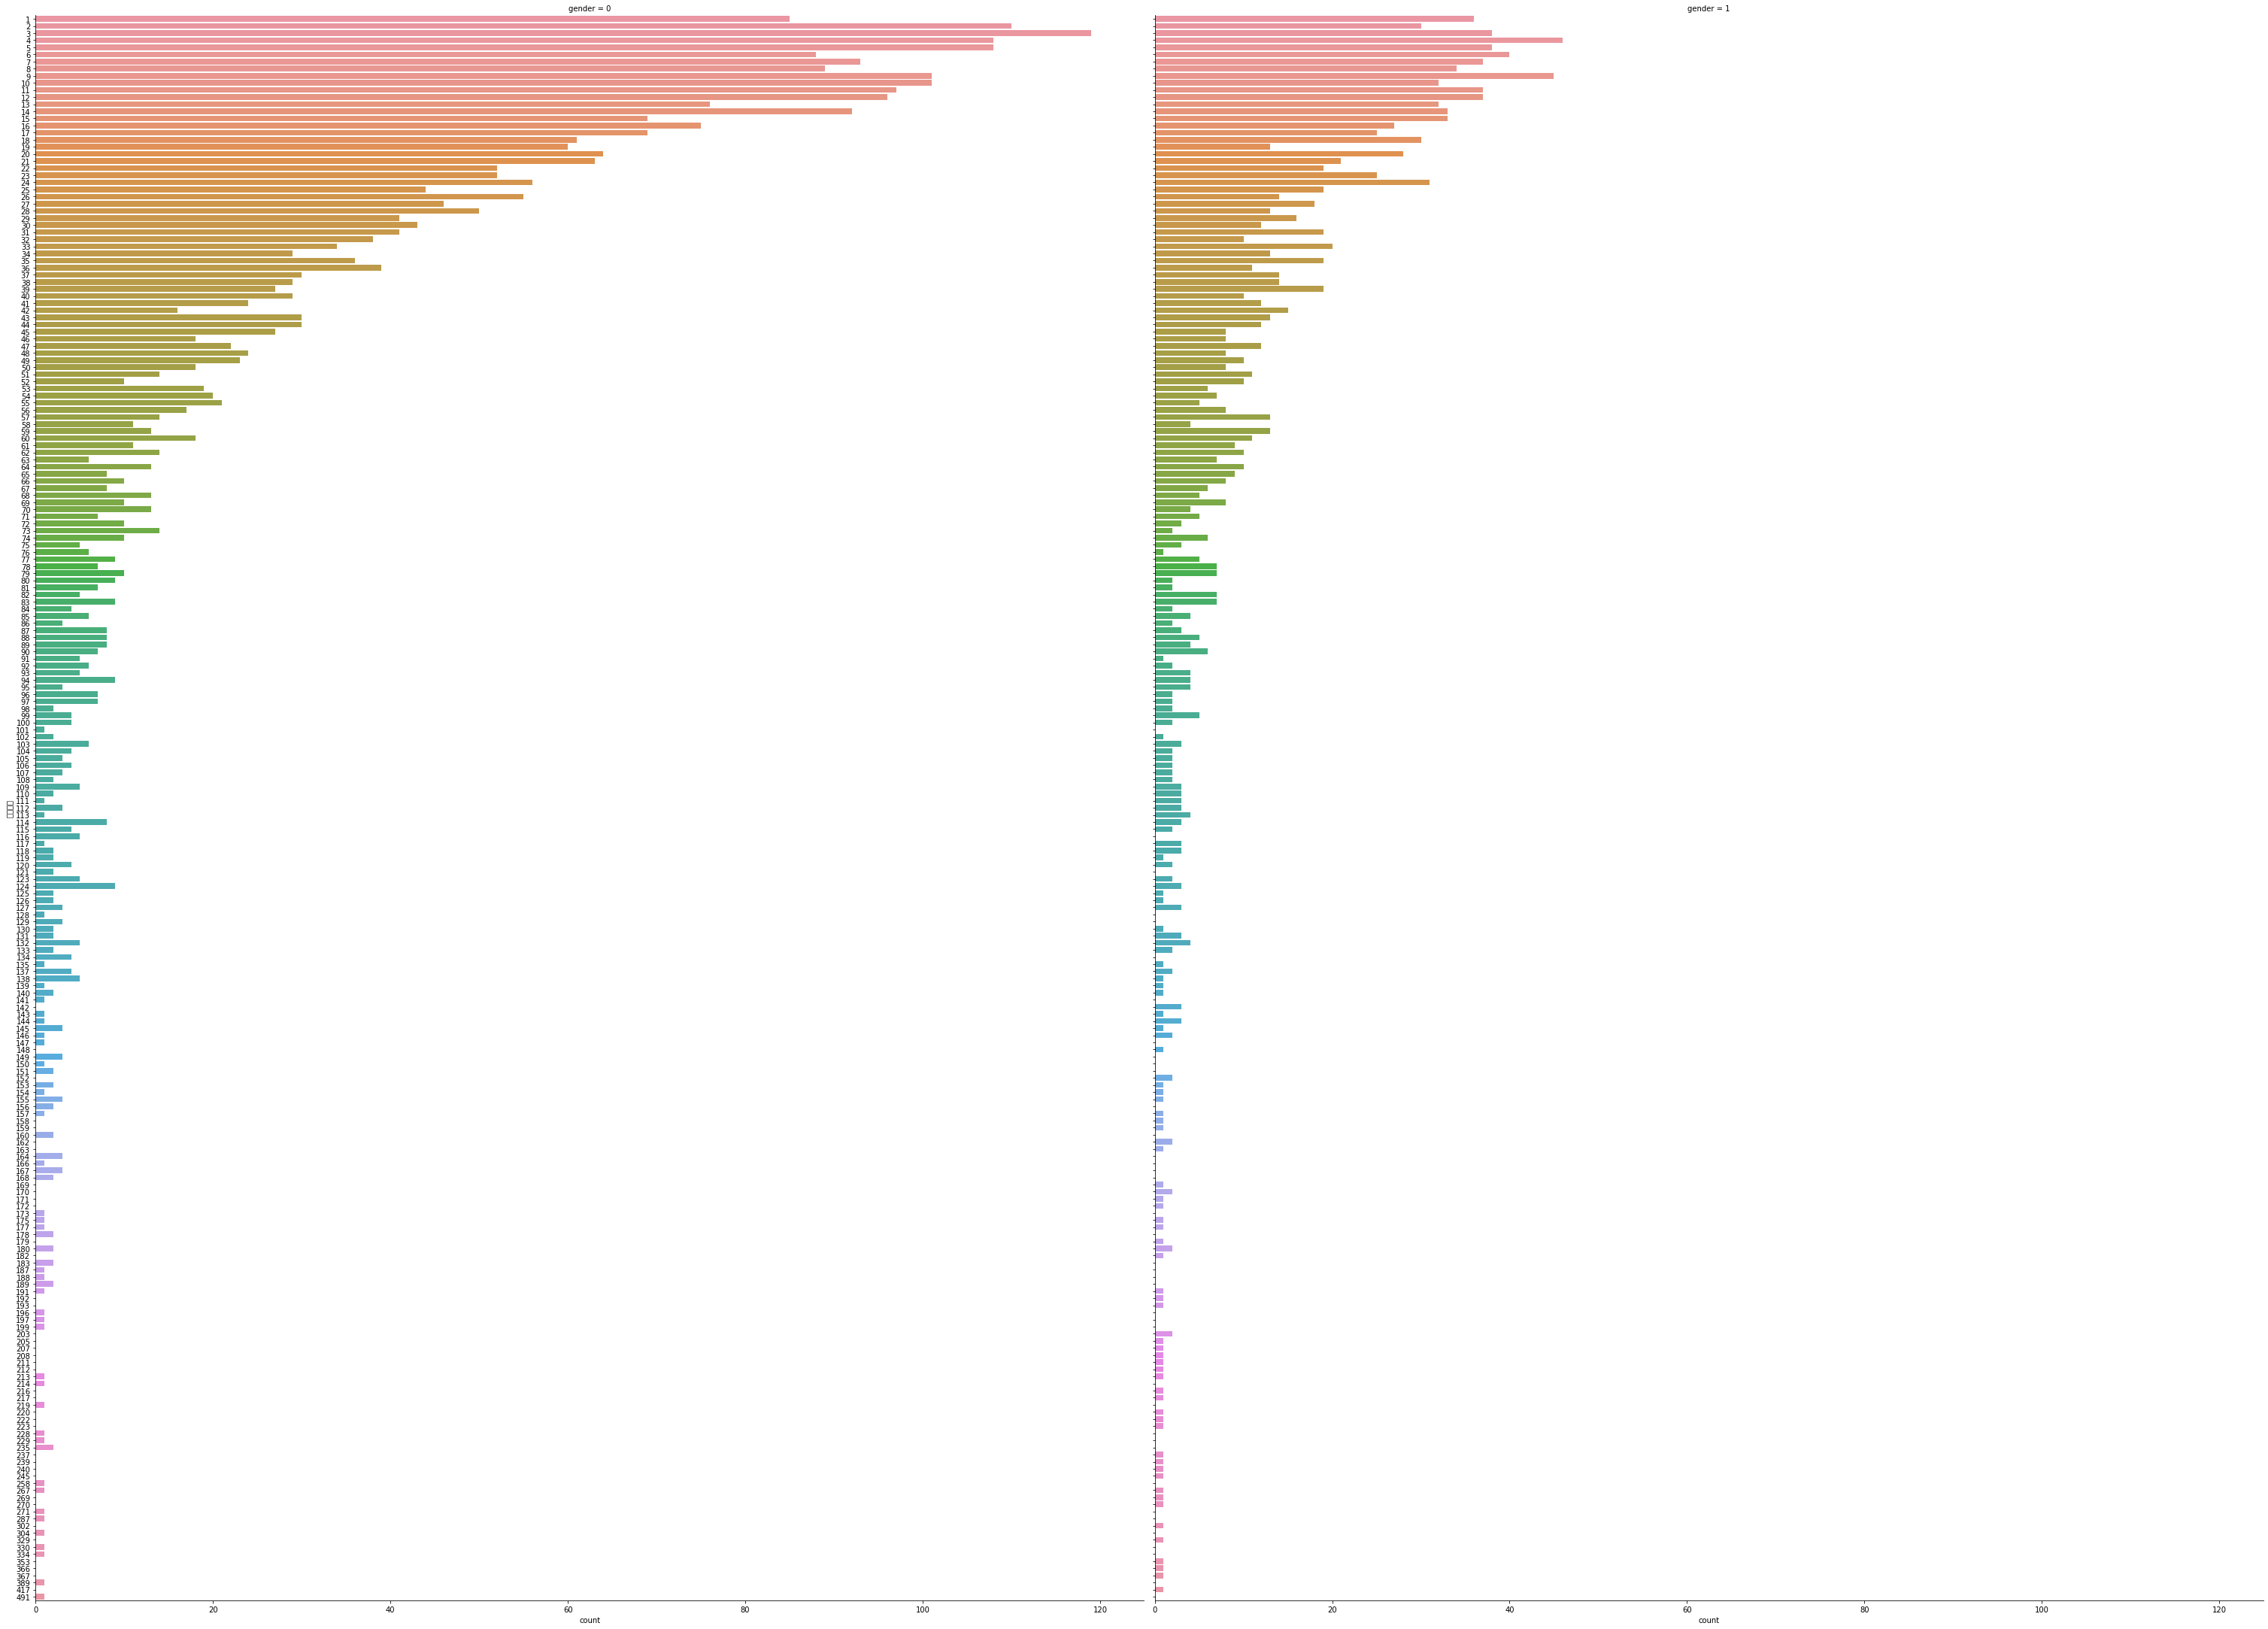

In [46]:
sns.catplot(y="구매건수", hue=None, col="gender",
                data=df, kind="count",
                height=30, aspect=.7)

In [47]:
df['mor_shop'] = df['아침_구매건수'] >= 1
df[['mor_shop']].head()

,mor_shop
0,False
1,True
2,True
3,False
4,False


In [48]:
df['lun_shop'] = df['점심_구매건수'] >= 1
df[['lun_shop']].head()

,lun_shop
0,True
1,True
2,True
3,True
4,False


In [49]:
df['eve_shop'] = df['저녁_구매건수'] >= 1
df[['eve_shop']].head()

,eve_shop
0,True
1,False
2,True
3,True
4,True


In [50]:
df['allday_shop'] = (df['mor_shop'] == 1) & (df['lun_shop'] == 1) & (df['eve_shop'] == 1)
df[['allday_shop']].head()

,allday_shop
0,False
1,False
2,True
3,False
4,False


In [51]:
df['spr_shop'] = df['봄_구매건수'] >= 1
df[['spr_shop','allday_shop']].head()

,spr_shop,allday_shop
0,True,False
1,True,False
2,True,True
3,True,False
4,True,False


In [52]:
df['summ_shop'] = df['여름_구매건수'] >= 1
df[['summ_shop','allday_shop']].head()

,summ_shop,allday_shop
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False


In [53]:
df['aut_shop'] = df['가을_구매건수'] >= 1
df[['aut_shop','allday_shop']].head()

,aut_shop,allday_shop
0,False,False
1,False,False
2,True,True
3,True,False
4,False,False


In [54]:
df['win_shop'] = df['겨울_구매건수'] >= 1
df[['win_shop','allday_shop']].head()

,win_shop,allday_shop
0,True,False
1,True,False
2,True,True
3,True,False
4,False,False


In [55]:
df['win_allday_shop'] = (df['win_shop'] == 1) & (df['allday_shop'] == 1)
df[['win_allday_shop']].head()

,win_allday_shop
0,False
1,False
2,True
3,False
4,False


In [56]:
df['aut_allday_shop'] = (df['aut_shop'] == 1) & (df['allday_shop'] == 1)
df[['aut_allday_shop']].head()

,aut_allday_shop
0,False
1,False
2,True
3,False
4,False


In [57]:
df['summ_allday_shop'] = (df['summ_shop'] == 1) & (df['allday_shop'] == 1)
df[['summ_allday_shop']].head()

,summ_allday_shop
0,False
1,False
2,False
3,False
4,False


In [58]:
df['spr_allday_shop'] = (df['spr_shop'] == 1) & (df['allday_shop'] == 1)
df[['spr_allday_shop']].head()

,spr_allday_shop
0,False
1,False
2,True
3,False
4,False


In [59]:
df['crazy_shop'] = (df['allday_shop'] == 1) & (df['spr_shop'] == 1) &\
(df['summ_shop'] == 1) & (df['aut_shop'] == 1) & (df['win_shop'] == 1)
df[['crazy_shop']].head()

,crazy_shop
0,False
1,False
2,False
3,False
4,False


In [60]:
df['light_pur'] = df['구매건수'] <= 20
df['middle_pur'] = (df['구매건수'] > 20) & (df['구매건수'] <= 100)
df['heavy_pur'] = df['구매건수'] > 100

print(df.shape)
df[['light_pur','middle_pur','heavy_pur']].head()

(5000, 34)


,light_pur,middle_pur,heavy_pur
0,True,False,False
1,True,False,False
2,False,True,False
3,False,True,False
4,True,False,False


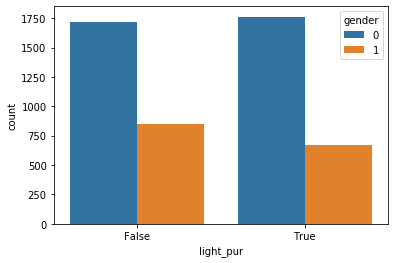

In [61]:
sns.countplot(data=df, x='light_pur', hue="gender")

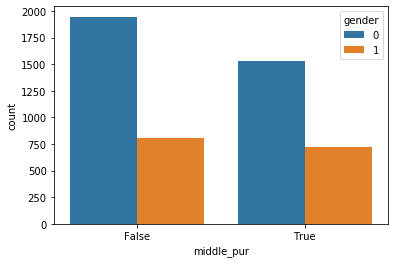

In [62]:
sns.countplot(data=df, x='middle_pur', hue="gender")

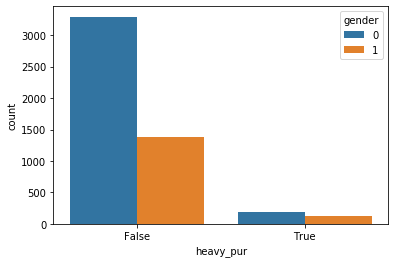

In [63]:
sns.countplot(data=df, x='heavy_pur', hue="gender")

In [64]:
mdf = df.copy()

In [65]:
pd.pivot_table(mdf, index="gender", values="heavy_pur")

,heavy_pur
gender,
0,0.053176
1,0.086785


In [66]:
mdf['heavy_pur_female'] = (mdf['gender'] == 0) & (mdf['heavy_pur'] == 1)
mdf['heavy_pur_male'] = (mdf['gender'] == 1) & (mdf['heavy_pur'] == 1)
mdf['middle_pur_female'] = (mdf['gender'] == 0) & (mdf['middle_pur'] == 1)
mdf['middle_pur_male'] = (mdf['gender'] == 1) & (mdf['middle_pur'] == 1)

In [67]:
mdf.corr()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,summ_allday_shop,spr_allday_shop,crazy_shop,light_pur,middle_pur,heavy_pur,heavy_pur_female,heavy_pur_male,middle_pur_female,middle_pur_male
custid,1.000000,0.262472,0.217251,0.218914,0.117939,0.093048,0.154303,0.212969,-0.017958,-0.162393,...,0.160565,0.118664,0.164613,-0.184735,0.114192,0.145770,0.085323,0.121105,-0.033619,0.206205
gender,0.262472,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,...,0.061750,0.054819,0.068299,-0.059852,0.029050,0.063453,-0.129606,0.249043,-0.439675,0.619301
총구매액,0.217251,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,...,0.334941,0.326461,0.381316,-0.451553,0.195910,0.526199,0.381089,0.351105,0.104797,0.140149
구매건수,0.218914,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,...,0.453505,0.442005,0.521629,-0.604874,0.238551,0.753619,0.545057,0.503718,0.158466,0.130080
평균구매가격,0.117939,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,...,-0.043445,-0.036902,-0.053074,0.046474,-0.027649,-0.038872,-0.030783,-0.022839,-0.056763,0.035406
평균할부개월수,0.093048,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,...,-0.031504,-0.025934,-0.046588,0.018414,-0.005421,-0.026701,-0.013630,-0.024536,-0.005467,-0.000503
구매브랜드종류,0.154303,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,...,0.504499,0.494962,0.569115,-0.685446,0.397749,0.593852,0.433943,0.391703,0.276145,0.201208
내점일수,0.212969,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,...,0.464488,0.455376,0.537197,-0.600706,0.261277,0.698670,0.502482,0.470325,0.181100,0.132562
수입상품_구매비율,-0.017958,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,...,-0.222041,-0.229667,-0.218220,0.246490,-0.201166,-0.094866,-0.068936,-0.063026,-0.155760,-0.080599
주말방문비율,-0.162393,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,...,-0.063057,-0.064288,-0.056886,0.089937,-0.062137,-0.057609,-0.043752,-0.036049,-0.038071,-0.038097


In [80]:
from sklearn.model_selection import train_test_split

dy = mdf['gender']
dx = mdf[['gender','crazy_shop','win_shop','aut_shop','summ_shop','spr_shop',
          'allday_shop','eve_shop','lun_shop','mor_shop','heavy_pur_female','heavy_pur_male',
          'middle_pur_female','middle_pur_male']]
X_train, X_test, y_train, y_test = train_test_split(dx, dy, test_size=0.25,)

In [81]:
dx.corr()

,gender,crazy_shop,win_shop,aut_shop,summ_shop,spr_shop,allday_shop,eve_shop,lun_shop,mor_shop,heavy_pur_female,heavy_pur_male,middle_pur_female,middle_pur_male
gender,1.000000,0.068299,0.032707,0.051598,0.052706,0.034801,0.050567,-0.021835,0.005464,0.095631,-0.129606,0.249043,-0.439675,0.619301
crazy_shop,0.068299,1.000000,0.420375,0.434022,0.455705,0.359428,0.756311,0.440241,0.155375,0.572362,0.200971,0.168101,0.334798,0.244392
win_shop,0.032707,0.420375,1.000000,0.276224,0.168883,0.156357,0.314567,0.255401,0.208082,0.261545,0.091650,0.076994,0.241952,0.142411
aut_shop,0.051598,0.434022,0.276224,1.000000,0.349431,0.155287,0.330172,0.265453,0.205776,0.286943,0.091919,0.076307,0.261179,0.168544
summ_shop,0.052706,0.455705,0.168883,0.349431,1.000000,0.136932,0.312586,0.225203,0.199090,0.276164,0.096726,0.080372,0.235935,0.162298
spr_shop,0.034801,0.359428,0.156357,0.155287,0.136932,1.000000,0.276181,0.211176,0.186784,0.248852,0.075289,0.065831,0.223051,0.137231
allday_shop,0.050567,0.756311,0.314567,0.330172,0.312586,0.276181,1.000000,0.582090,0.205438,0.756781,0.149835,0.125861,0.293457,0.209014
eve_shop,-0.021835,0.440241,0.255401,0.265453,0.225203,0.211176,0.582090,1.000000,0.045134,0.092907,0.085251,0.067999,0.209194,0.100877
lun_shop,0.005464,0.155375,0.208082,0.205776,0.199090,0.186784,0.205438,0.045134,1.000000,0.092561,0.033875,0.028458,0.109747,0.070767
mor_shop,0.095631,0.572362,0.261545,0.286943,0.276164,0.248852,0.756781,0.092907,0.092561,1.000000,0.117770,0.102078,0.229911,0.197740


### voting ensemble

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'hard')

In [71]:
from sklearn.metrics import accuracy_score
for clf in (logreg, tree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

LogisticRegression 0.876
DecisionTreeClassifier 0.8768
KNeighborsClassifier 0.8416
VotingClassifier 0.876


### Averaging predictions

In [72]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='...
                                        

In [73]:
averaging.fit(X_train, y_train).score(X_test, y_test)

0.8752

### Stacking

In [74]:
from mlxtend.classifier import StackingClassifier
import numpy as np
np.random.seed(1671)

stacking = StackingClassifier(classifiers=[ada,mlp,lsv,tree,svm,knn,gbm,ranfor], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (ada, mlp, svm, lsv, tree, knn, gbm, ranfor, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

AdaBoostClassifier 0.876
MLPClassifier 0.876
SVC 0.876
LinearSVC 0.876
DecisionTreeClassifier 0.8768
KNeighborsClassifier 0.8416
GradientBoostingClassifier 0.8744
RandomForestClassifier 0.8776
StackingClassifier 0.8752


### 크로스 밸리데이션

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [76]:
# logreg - 72.8 / mlp - 72.3 / ranfor - 71.5 / lsv - 72.5 / gbm - 71.5 / ada - 71.7

In [77]:
scores = cross_val_score(ada, X_train, y_train, cv=10)
print("크로스 밸리데이션 결과 =", scores)
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

크로스 밸리데이션 결과 = [0.85066667 0.88266667 0.88266667 0.86133333 0.856      0.86133333
 0.864      0.85866667 0.87466667 0.832     ]
Mean: 0.862
Std: 0.014
Min: 0.832
Max: 0.883
